In [43]:
import pandas as pd
import warnings
import numpy as np

warnings.simplefilter('ignore')

In [5]:
labels_df =  pd.read_csv("/work/data/input/nfl-health-and-safety-helmet-assignment/train_labels.csv")

In [44]:
target_video_view = "57583_000082_Endzone"

ext_labels_df = labels_df[labels_df["video_frame"].str.contains(target_video_view)]
ext_labels_df["x"] = ext_labels_df["left"] + ext_labels_df["width"]/2
ext_labels_df["y"] = ext_labels_df["top"] + ext_labels_df["height"]/2
ext_labels_df["xy"] = [np.array((x,y)) for x,y in zip(ext_labels_df["x"],ext_labels_df["y"])]
ext_labels_df

,video_frame,gameKey,playID,view,video,frame,label,left,width,top,height,impactType,isDefinitiveImpact,isSidelinePlayer,x,y,xy
0,57583_000082_Endzone_1,57583,82,Endzone,57583_000082_Endzone.mp4,1,H90,245,21,327,29,None,False,False,255.5,341.5,"[255.5, 341.5]"
1,57583_000082_Endzone_1,57583,82,Endzone,57583_000082_Endzone.mp4,1,V79,310,21,345,12,None,False,False,320.5,351.0,"[320.5, 351.0]"
2,57583_000082_Endzone_1,57583,82,Endzone,57583_000082_Endzone.mp4,1,H97,410,21,323,29,None,False,False,420.5,337.5,"[420.5, 337.5]"
3,57583_000082_Endzone_1,57583,82,Endzone,57583_000082_Endzone.mp4,1,V72,443,22,344,16,None,False,False,454.0,352.0,"[454.0, 352.0]"
4,57583_000082_Endzone_1,57583,82,Endzone,57583_000082_Endzone.mp4,1,H50,518,21,212,28,None,False,False,528.5,226.0,"[528.5, 226.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8504,57583_000082_Endzone_99,57583,82,Endzone,57583_000082_Endzone.mp4,99,V87,933,20,287,16,None,False,False,943.0,295.0,"[943.0, 295.0]"
8505,57583_000082_Endzone_99,57583,82,Endzone,57583_000082_Endzone.mp4,99,H36,1000,22,232,26,None,False,False,1011.0,245.0,"[1011.0, 245.0]"
8506,57583_000082_Endzone_99,57583,82,Endzone,57583_000082_Endzone.mp4,99,H59,1002,19,270,16,None,False,False,1011.5,278.0,"[1011.5, 278.0]"
8507,57583_000082_Endzone_99,57583,82,Endzone,57583_000082_Endzone.mp4,99,V15,1006,18,282,23,None,False,False,1015.0,293.5,"[1015.0, 293.5]"


In [73]:
pivot_df = ext_labels_df.pivot(index = "frame",columns = "label",values = "xy")

<AxesSubplot:xlabel='frame'>

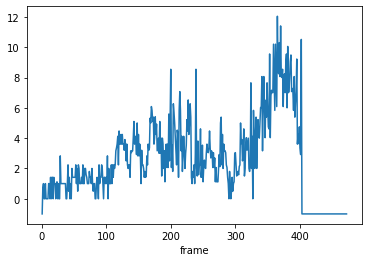

In [83]:
dif_pivot_df = pivot_df -  pivot_df.shift(1)

for col in dif_pivot_df.columns:
    dif_pivot_df[col] = dif_pivot_df[col].apply(lambda x:np.linalg.norm(x) if type(x) == np.ndarray else -1).fillna(-1)
    
dif_pivot_df["H27"].plot()